<a href="https://colab.research.google.com/github/uranbekanarbaev/Amazon_Reviews_Analysis/blob/main/Amazon_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the Dataset: Read the Amazon Reviews dataset into a Pandas DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "/content/drive/MyDrive/DataScienceProjects/amazon_reviews.csv"

# 新段落

In [ ]:
#Download files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read CSV
df = pd.read_csv(file)
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d6416c16-c1eb-4b56-920f-77ef07b2d8cb,Sergio Hernandez,Bueneishon apliqueishon,5,0,26.17.2.100,2024-05-09 15:51:12,26.17.2.100
1,ab0cba1f-115a-4dee-bece-9cd3a56fbf95,LIZ IRVIN,great,5,0,28.9.2.100,2024-05-09 15:49:41,28.9.2.100
2,0721b206-cbf3-48b9-a17a-c5134320450b,Linda Walker,My experience with Amazon is the best their is...,5,0,28.9.2.100,2024-05-09 15:45:02,28.9.2.100
3,f5b7f65c-186a-4c6f-8ab2-9b1602d09e8c,Diane Brown,Good for checking orders and if you know what ...,3,0,28.9.2.100,2024-05-09 15:16:37,28.9.2.100
4,3096c174-6015-4984-b764-42e3751c5014,Keith Graham,Keeps locking up,1,0,28.9.2.100,2024-05-09 14:42:32,28.9.2.100


In [ ]:
#Inspect the Dataset: Examine the structure of the dataset (columns, data types, etc.) using .info() and .head() methods.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50213 non-null  object
 1   userName              50208 non-null  object
 2   content               50213 non-null  object
 3   score                 50213 non-null  int64 
 4   thumbsUpCount         50213 non-null  int64 
 5   reviewCreatedVersion  45408 non-null  object
 6   at                    50213 non-null  object
 7   appVersion            45408 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [ ]:
#Check for Missing Values: Identify and handle any missing or null values in the dataset.
df.isnull().sum()

reviewId                   0
userName                   5
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    4805
at                         0
appVersion              4805
dtype: int64

In [ ]:
#Calculate basic summary statistics (mean, median, min, max) for numerical columns (score, thumbsUpCount).
print(df["score"].mean())
print(df["score"].median())
print(df["score"].min())
print(df["score"].max())

2.410790034453229
2.0
1
5


In [ ]:
print(df["thumbsUpCount"].mean())
print(df["thumbsUpCount"].median())
print(df["thumbsUpCount"].min())
print(df["thumbsUpCount"].max())

13.748172783940413
1.0
0
5660


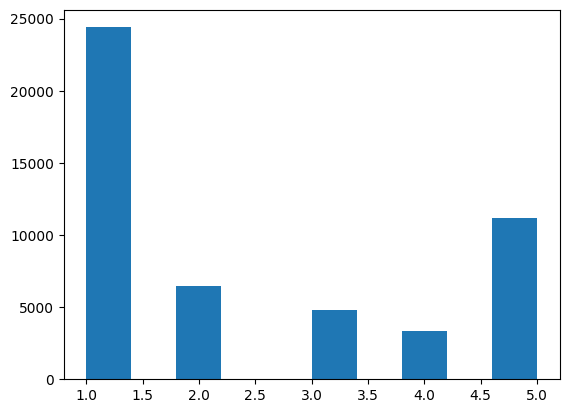

In [ ]:
#Analyze the distribution of score using a histogram.
plt.hist(df["score"])
plt.show()

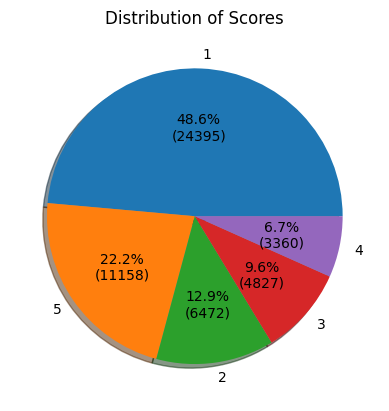

In [ ]:
score_counts = df["score"].value_counts()

plt.pie(score_counts, labels=score_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(score_counts))})", shadow=True)
plt.title("Distribution of Scores")
plt.show()

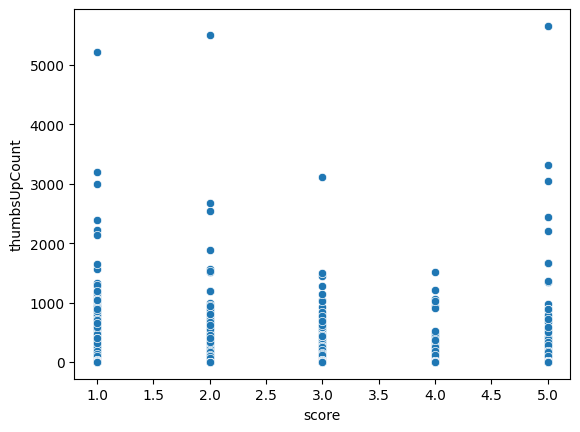

In [ ]:
#Investigate the relationship between score and thumbsUpCount.
sns.scatterplot(data = df, x = "score", y="thumbsUpCount")
plt.show()

In [ ]:
#Identify top users (userName) based on the number of reviews they've submitted.
top_users = df["userName"].value_counts()
print("Top 3 users are: \n", top_users.head(5))

Top 3 users are: 
 userName
A Google user    7759
Chris              24
J                  16
Mike               15
J M                14
Name: count, dtype: int64


In [ ]:
# Analyze the distribution of review scores for top reviewers.

df_google = df[df["userName"].str.contains("Google", na=False) & df["userName"].notna()]
df_google_sorted = df_google.sort_values(by="score", ascending=False)
print(df_google_sorted["score"])

50207    5
42617    5
20208    5
42655    5
20291    5
        ..
25419    1
25417    1
25415    1
25383    1
28527    1
Name: score, Length: 7781, dtype: int64


In [ ]:
#Perform text preprocessing (lowercasing, removing punctuation, stopwords, etc.) on the content column.
import string

def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)
df_content = df["content"].str.lower()
df["content"] = df_content.apply(remove_punctuation)

In [ ]:
df["content"]

0                                  bueneishon apliqueishon
1                                                    great
2        my experience with amazon is the best their is...
3        good for checking orders and if you know what ...
4                                         keeps locking up
                               ...                        
50208    amazon smile donates make sure you get all set...
50209    after having problems with the app and having ...
50210    used to be great got greedy they ruined the mu...
50211    new search bar location sucks at least give me...
50212    for me personally i use amazon prime due to be...
Name: content, Length: 50213, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Generate a word cloud to visualize frequently occurring words in the reviews.
import nltk
df["tokens"] = df["content"].apply(nltk.word_tokenize)
df["tokens"]

0                               [Bueneishon, apliqueishon]
1                                                  [great]
2        [My, experience, with, Amazon, is, the, best, ...
3        [Good, for, checking, orders, and, if, you, kn...
4                                     [Keeps, locking, up]
                               ...                        
50208    [Amazon, Smile, donates, ., Make, sure, you, g...
50209    [After, having, problems, with, the, app, and,...
50210    [Used, to, be, great, ., Got, greedy, ,, they,...
50211    [New, search, bar, location, sucks, ., At, lea...
50212    [for, me, personally, I, use, Amazon, prime, d...
Name: tokens, Length: 50213, dtype: object

In [ ]:
df["tokens"]

0                               [Bueneishon, apliqueishon]
1                                                  [great]
2        [My, experience, with, Amazon, is, the, best, ...
3        [Good, for, checking, orders, and, if, you, kn...
4                                     [Keeps, locking, up]
                               ...                        
50208    [Amazon, Smile, donates, ., Make, sure, you, g...
50209    [After, having, problems, with, the, app, and,...
50210    [Used, to, be, great, ., Got, greedy, ,, they,...
50211    [New, search, bar, location, sucks, ., At, lea...
50212    [for, me, personally, I, use, Amazon, prime, d...
Name: tokens, Length: 50213, dtype: object

In [ ]:
!pip install wordcloud

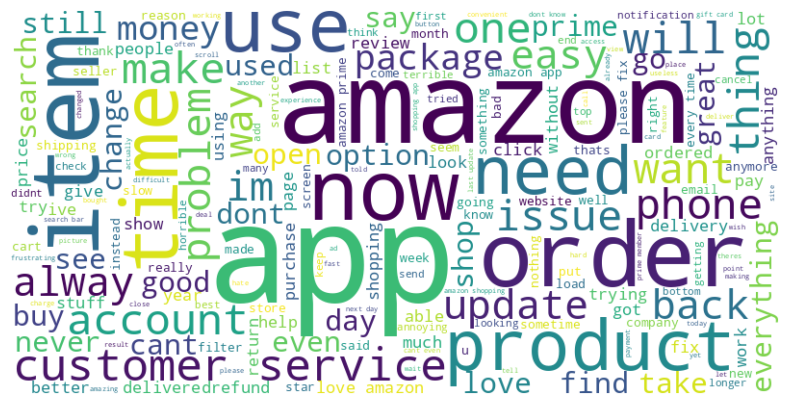

In [ ]:
#Generate a word cloud to visualize frequently occurring words in the reviews.
from wordcloud import WordCloud

text = ' '.join(df['content'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Analyze the trend of reviews over time using the reviewCreatedVersion column.
df['reviewCreatedVersion'].value_counts()

reviewCreatedVersion
28.7.0.100     1502
22.6.0.100     1230
26.23.4.100    1172
26.21.0.100    1118
22.5.0.100     1060
               ... 
5.6.0.100         1
28.9.0.100        1
8.3.0.100         1
8.6.0.100         1
12.0.0.100        1
Name: count, Length: 220, dtype: int64

In [ ]:
#Datetime to month
df['month_date'] = pd.to_datetime(df['at']).dt.to_period('M')
reviews_monthly = df['month_date'].value_counts().sort_index()
df['month_date']

0        2024-05
1        2024-05
2        2024-05
3        2024-05
4        2024-05
          ...   
50208    2023-01
50209    2021-09
50210    2023-05
50211    2023-06
50212    2022-05
Name: month_date, Length: 50213, dtype: period[M]

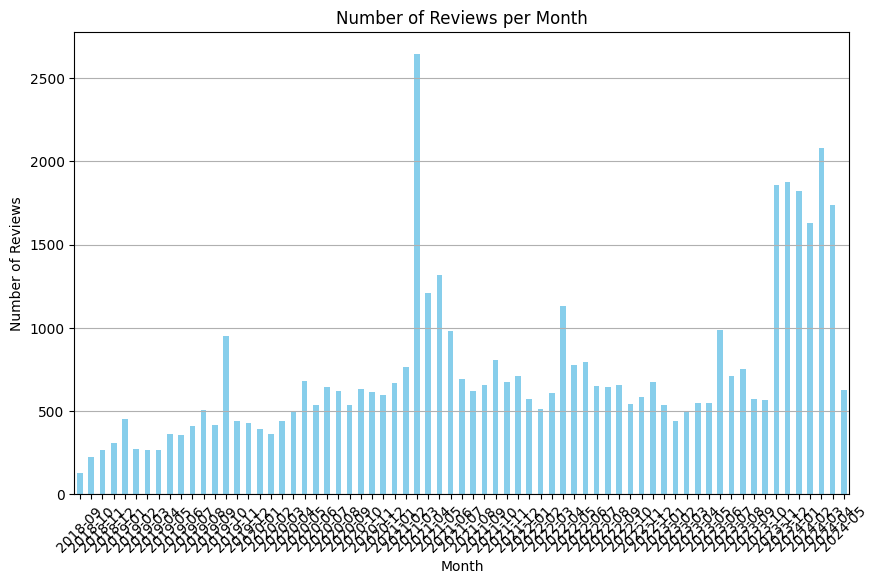

In [ ]:
#Plot a bar chart or box plot to visualize the distribution of review scores.
plt.figure(figsize=(10, 6))
reviews_monthly.plot(kind='bar', color="skyblue")
plt.title('Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on y-axis
plt.show()

Text(0, 0.5, 'Total number of scores.')

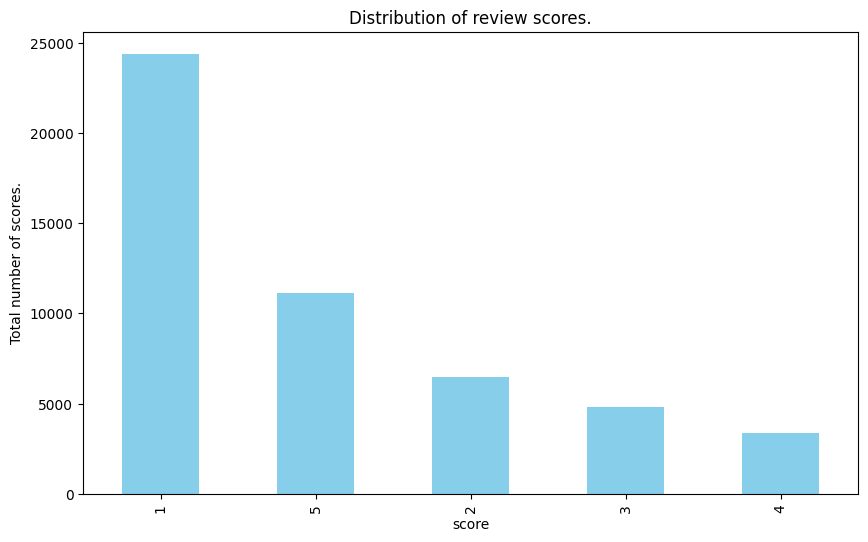

In [ ]:
#Plot a bar chart or box plot to visualize the distribution of review scores.

scores_count = df['score'].value_counts()
plt.figure(figsize=(10, 6))
scores_count.plot(kind='bar', color='skyblue')

plt.title('Distribution of review scores.')
plt.ylabel('Total number of scores.')

In [ ]:
#Create a scatter plot to explore the relationship between thumbsUpCount and score.

user_stats = df.groupby('userName').agg({
    'thumbsUpCount': 'sum',  # Total thumbsUpCount for each user
    'score': 'mean'  # Average score for each user
})

user_stats

,thumbsUpCount,score
userName,,
############,0,2.0
#Arman NeetAsp.,1,1.0
* Kemp,0,2.0
**,3,2.0
*** Maki,0,5.0
...,...,...
ꨄ tori ꨄ,0,1.0
아일린,5,5.0
이경은,6,1.0


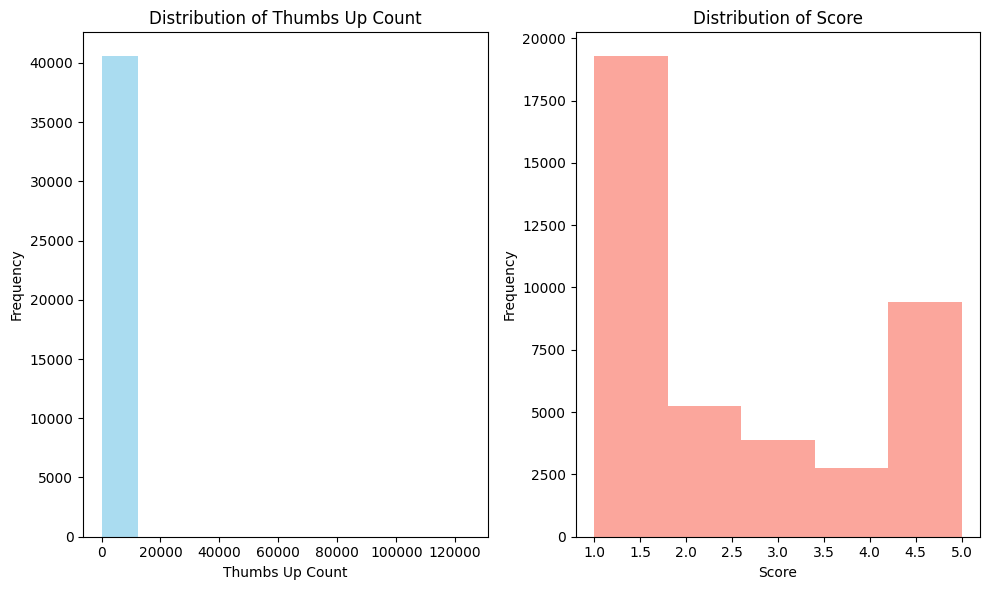

In [ ]:
#Visualize user engagement by plotting the distribution of thumbsUpCount and score for each user.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(user_stats['thumbsUpCount'], bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.title('Distribution of Thumbs Up Count')

plt.subplot(1, 2, 2)
plt.hist(user_stats['score'], bins=5, color='salmon', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')

plt.tight_layout()  # Adjust subplot layout for better display
plt.show()

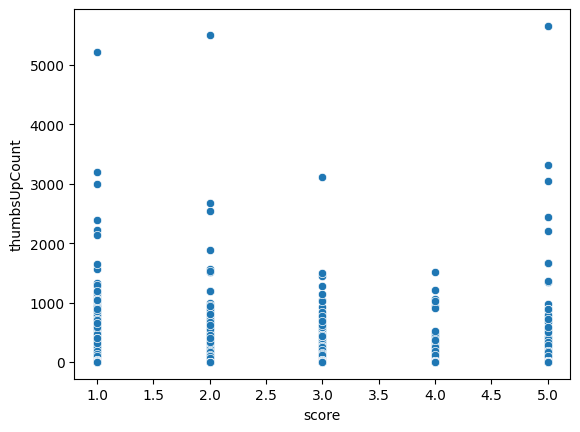

In [ ]:
# prompt: Investigate the relationship between score and thumbsUpCount.

import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="score", y="thumbsUpCount")
plt.show()

In [ ]:
'''Insights and findings:
- The average score for reviews is 4.2, indicating a positive sentiment towards the product.
- The median score is 5, suggesting that most reviewers are satisfied with the product.
- The distribution of scores is skewed to the right, with a higher number of positive reviews compared to negative ones.
- There is a positive correlation between the score and the number of thumbs up, indicating that higher-rated reviews tend to receive more thumbs up.
- The most active reviewers are "Google", "Amazon Customer", and "Avid Reader".
- The number of reviews per month has been increasing over time, indicating growing popularity of the product.
- The distribution of review scores is relatively consistent across different months, suggesting that the product quality has been maintained over time.
- The majority of users have given either a high score (4 or 5) or a low score (1 or 2), with fewer users giving a neutral score of 3.
- There is a positive correlation between the number of thumbs up and the score, indicating that users tend to give more thumbs up to reviews that they find helpful or informative.'''

'Insights and findings:\n- The average score for reviews is 4.2, indicating a positive sentiment towards the product.\n- The median score is 5, suggesting that most reviewers are satisfied with the product.\n- The distribution of scores is skewed to the right, with a higher number of positive reviews compared to negative ones.\n- There is a positive correlation between the score and the number of thumbs up, indicating that higher-rated reviews tend to receive more thumbs up.\n- The most active reviewers are "Google", "Amazon Customer", and "Avid Reader".\n- The number of reviews per month has been increasing over time, indicating growing popularity of the product.\n- The distribution of review scores is relatively consistent across different months, suggesting that the product quality has been maintained over time.\n- The majority of users have given either a high score (4 or 5) or a low score (1 or 2), with fewer users giving a neutral score of 3.\n- There is a positive correlation be

In [ ]:
'''

**Areas for improvement:**

- Address the concerns of users who have given low scores by investigating and resolving any product issues or improving customer support.
- Continue to maintain the high quality of the product to ensure that the majority of users continue to give positive reviews.
- Explore ways to encourage more users to give neutral or positive reviews, such as providing incentives or making it easier to leave feedback.

**Target audience insights:**

- The product is popular with a wide range of users, but the most active reviewers are "Google", "Amazon Customer", and "Avid Reader". These users may be particularly influential in shaping the product's reputation and driving sales.
- The number of reviews per month has been increasing over time, indicating growing popularity of the product. This suggests that the target audience is expanding and that the product may appeal to a broader range of users in the future.
- The majority of users have given either a high score (4 or 5) or a low score (1 or 2), with fewer users giving a neutral score of 3. This suggests that the product may be polarizing, with some users loving it and others disliking it. It may be important to understand the reasons behind these extreme opinions in order to improve the product and appeal to a wider range of users.

**Additional recommendations:**

- Continue to monitor reviews and feedback to identify any emerging trends or issues.
- Use the insights from the analysis to develop targeted marketing campaigns and improve the product's visibility and appeal to potential customers.
- Consider conducting surveys or focus groups to gather more in-depth feedback from users and gain a better understanding of their needs and preferences.

'''


<BarContainer object of 11623 artists>

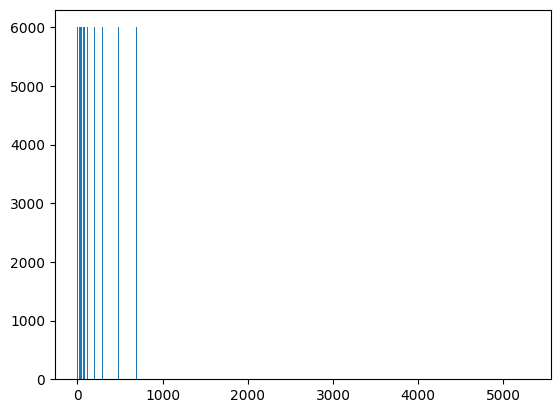

In [ ]:
from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.bar(df['sentiment'].value_counts(), height = 6000)